### Mean field model with a layered circuit

In [1]:
import sys

sys.path.insert(1, "/home/vinicius/storage1/projects/IPP_WANG")

In [2]:
import numpy as np
import nest
import src.setParams
import matplotlib.pyplot as plt
import src.plot_figures as plot_figures
import src.plot_utils as plot
import src.meanfieldcircuit as meanfield
import src.setParams as setParams


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: nest-3.0
 Built: Jan  4 2023 15:13:43

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
nest.set_verbosity("M_ERROR")

### Simulation parameters

In [4]:
lnt = 20

### Model parameters

In [5]:
simtime = 10000.  # ms
trans   = 0.2     # ms
dt      = 0.2     # ms
seed    = 100

### Simulation

In [6]:
# Model parameters (default is Weak GBA)
params = setParams.get_params_rate_model()

In [7]:
# Simulating Weak GBA
tidx, r_w, max_freq_w = meanfield.simulate(simtime = simtime, dt = dt, params=params, max_cond = False, seed = 10)

In [8]:
# Model parameters (default is Strong GBA)
params = setParams.get_params_rate_model(gba='strong-gba')
# Simulating Strong GBA
tidx, r_s, max_freq_s = meanfield.simulate(simtime = simtime, dt = dt, params=params, max_cond = False, seed = 10)

Varying $\mu_{ee}$ for weak and strong GBA (with and withoud max condition)

In [9]:
muee_vec    = np.arange(20,52,2, dtype=float)
max_r_24c_f = np.zeros([muee_vec.shape[0],2]) # Store max freq in 24c with max_cond = False
max_r_24c_t = np.zeros([muee_vec.shape[0],2]) # Store max freq in 24c with max_cond = True
#params['Iext']            = 22.05*1.9
params = setParams.get_params_rate_model()

for uu in [0,1]:
    for i in range(muee_vec.shape[0]):
        if uu == 1:
            params['weights']['wei']  = 19.7 + (muee_vec[i]-33.7)*55.0/178.0
        else:
            params['weights']['wei']  = 19.7
        params['weights']['muee'] = muee_vec[i]
        t,r,max_freq = meanfield.simulate(simtime = simtime, dt = dt, params = params, seed = 10, max_cond = False)
        max_r_24c_f[i,uu] = max_freq[-1]-10
        if max_r_24c_f[i,uu] > 500.:
            max_r_24c_f[i,uu] = 500.

for uu in [0,1]:
    for i in range(muee_vec.shape[0]):
        if uu == 1:
            params['weights']['wei']  = 19.7 + (muee_vec[i]-33.7)*55.0/178.0
        else:
            params['weights']['wei']  = 19.7
        params['weights']['muee'] = muee_vec[i]
        t,r,max_freq = meanfield.simulate(simtime = simtime, dt = dt, params = params, seed = 10, max_cond = True)
        max_r_24c_t[i,uu] = max_freq[-1]-10
        if max_r_24c_t[i,uu] > 500.:
            max_r_24c_t[i,uu] = 500.

#### Model

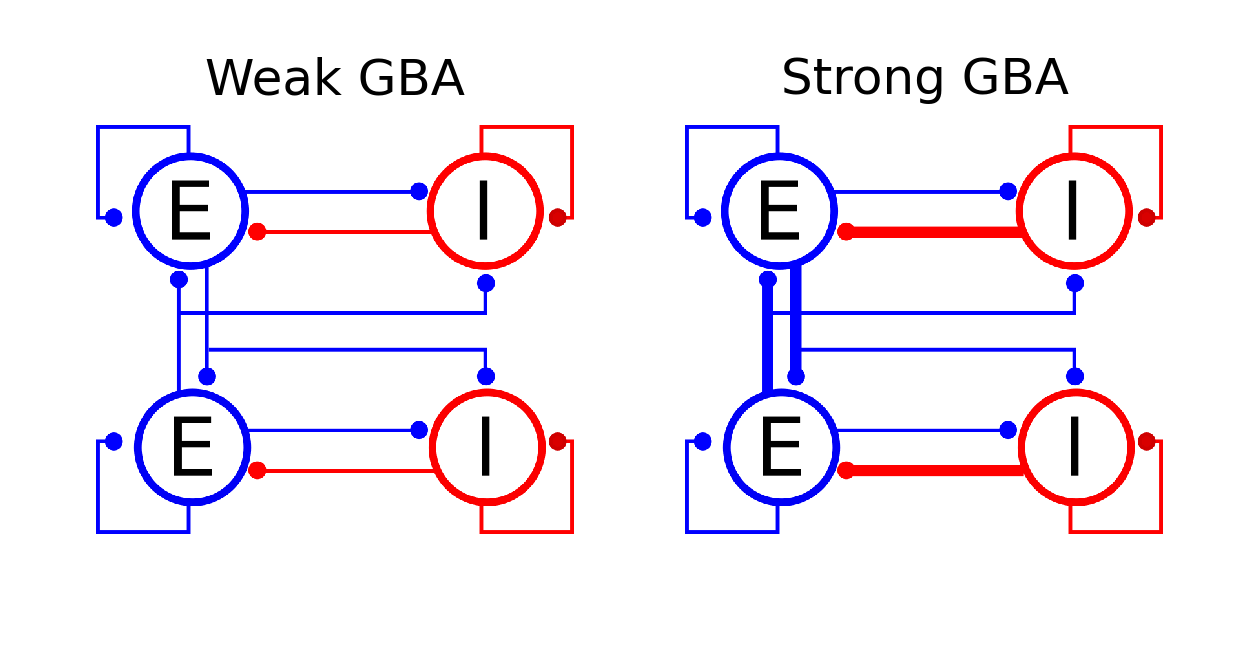

In [28]:
fig = plt.figure(figsize=(4, 2), dpi=300)


def plot_png(ax, figname):
    png = plt.imread(figname)
    plt.sca(ax)
    im = plt.imshow(png, interpolation='none')
    plt.axis('off')    
    pad = 10
    plt.xlim(-pad, png.shape[1]+pad)
    plt.ylim(png.shape[0]+pad, -pad)       
    
gs0 = fig.add_gridspec(
    nrows=1,
    ncols=2,
    left=0.05,
    right=0.95,
    hspace=0.05,
    bottom=0.05,
    top=0.95,
)

axs0 = [plt.subplot(gs0[i]) for i in range(2)]

for i in range(2):
    plot_png(axs0[i], f"circuit{i + 1}.png")
    if i == 0:
        plt.title("Weak GBA")
    else:
        plt.title("Strong GBA")

bg = plot.Background(visible=False)

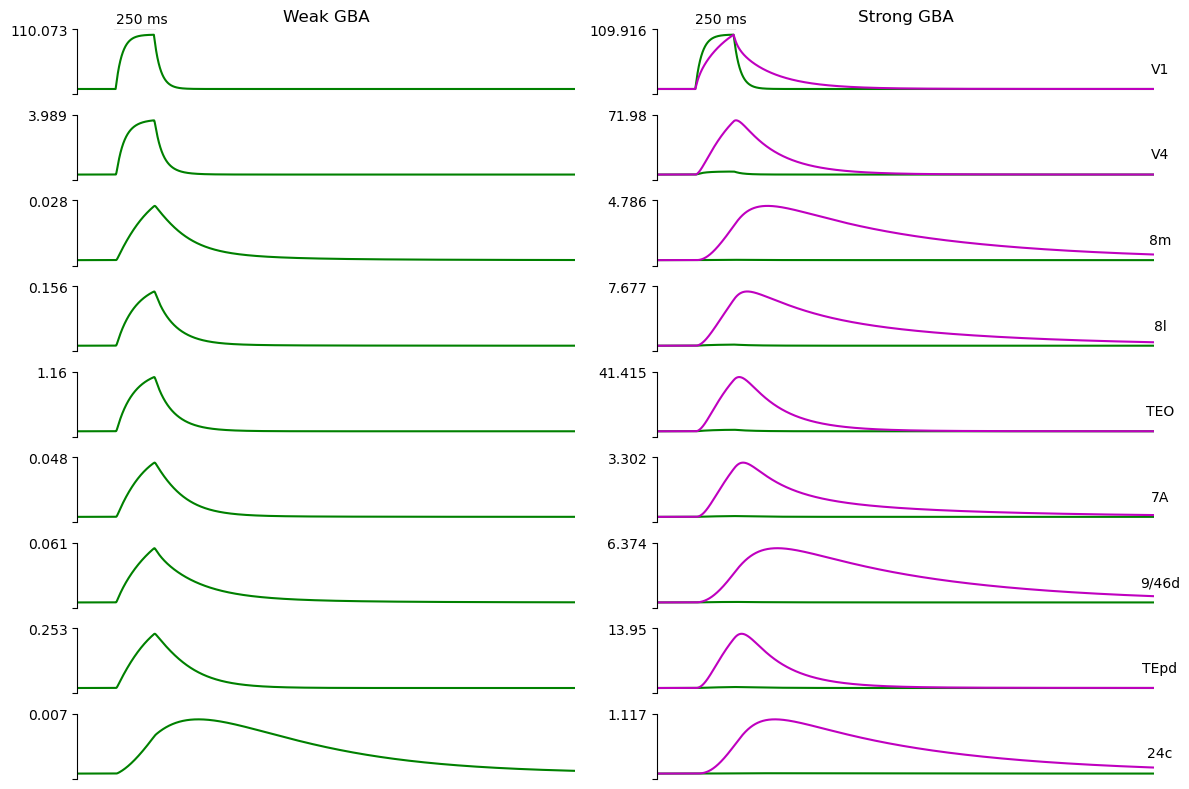

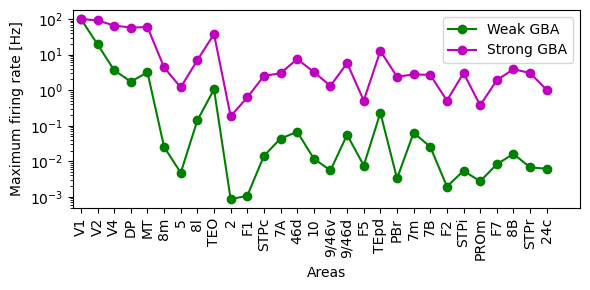

In [32]:
plt.figure(figsize=(12, 8))
plot_figures.fig3b_d(tidx, r_w, max_freq_w, r_s, max_freq_s)

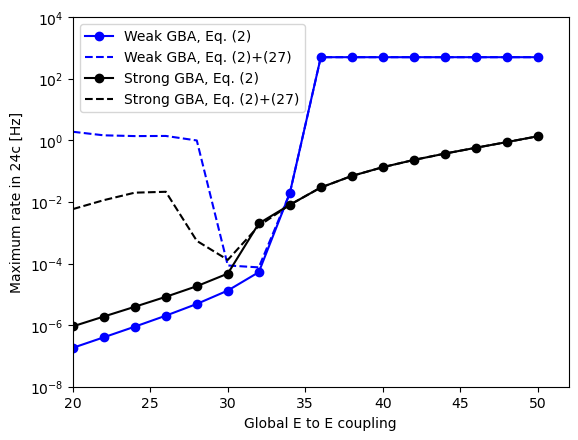

In [34]:
plot_figures.fig3_f(muee_vec, max_r_24c_t, max_r_24c_f)